In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_bt = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response = requests.get(btc_url).json()
btc_price = response['data']['1']['quotes']['USD']['price']

In [6]:
# Fetch current ETH price
# YOUR CODE HERE!
response = requests.get(eth_url).json()
eth_price = response['data']['1027']['quotes']['USD']['price']

In [7]:
# Compute current value of my crpto
# YOUR CODE HERE!
btc_value = my_bt * btc_price
eth_value = my_eth * eth_price
crypto_value = btc_value + eth_value

In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_bt} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")
print(f"Your total crypto portfolio is worth ${crypto_value:0.2f}")

The current value of your 1.2 BTC is $34672.80
The current value of your 5.3 ETH is $10326.41
Your total crypto portfolio is worth $44999.21


In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [68]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [69]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [70]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [71]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [72]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [73]:
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [74]:
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [75]:
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-14 04:00:00+00:00,118.58,118.74,118.58,118.67,3986756,14580,118.667216,AGG
2020-07-14 04:00:00+00:00,313.30,319.76,312.00,318.93,93545651,580270,316.244144,SPY


In [77]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

In [78]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

In [79]:
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

SPY                                               \
                            open    high    low   close    volume trade_count   
timestamp                                                                       
2020-07-14 04:00:00+00:00  313.3  319.76  312.0  318.93  93545651      580270   

                                          AGG                          \
                                 vwap    open    high     low   close   
timestamp                                                               
2020-07-14 04:00:00+00:00  316.244144  118.58  118.74  118.58  118.67   

                                                            
                            volume trade_count        vwap  
timestamp                                                   
2020-07-14 04:00:00+00:00  3986756       14580  118.667216

In [81]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = 318.93
spy_close_price = 118.67

In [82]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $318.93
Current SPY closing price: $118.67


In [83]:
# Compute the current value of shares
# YOUR CODE HERE!
agg_value = my_agg * agg_close_price
spy_value = my_spy * spy_close_price
portfolio_value = agg_value + spy_value

In [84]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $5933.50
The current value of your 200 AGG shares is $63786.00


In [85]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

In [115]:
# Consolidate financial assets data
# YOUR CODE HERE!
financial_assets = {
    'Cryptocurrency': 44999.21,
    'Stocks': 5933.50,
    'Bonds': 63786.00,
    'Cash':   0
}

In [117]:
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame.from_dict(financial_assets, orient='index', columns=['Value'])

In [118]:
# Display savings DataFrame
display(df_savings)

,Value
Cryptocurrency,44999.21
Stocks,5933.50
Bonds,63786.00
Cash,0.00


<AxesSubplot:title={'center':'Crypto & Stock Savings'}, ylabel='Value'>

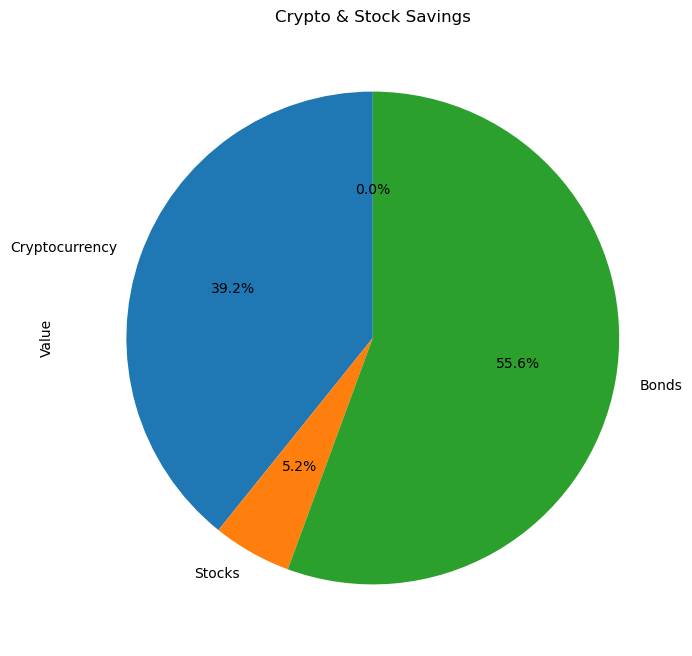

In [120]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', y='Value', legend=False, autopct='%1.1f%%', 
                startangle=90, figsize=(8, 8), title='Crypto & Stock Savings')

In [121]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

In [122]:
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = sum(financial_assets.values())
print(f"Total savings: ${total_savings}")

Total savings: $114718.70999999999


In [126]:
# Validate saving health
# YOUR CODE HERE!
print("Congratulations! You have enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.
